In [2]:
from os.path import join
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from os.path import dirname, abspath,join
import sys
#sys.path.append(dirname(dirname(abspath(__file__))))
sys.path.append("../")
from process_pipeline.config import get_folders

DATA_DIR,INPUT_DIR,OUTPUT_DIR,INTERMEDIATE_DIR = get_folders(key="local")

In [3]:
X_np = np.load(join(OUTPUT_DIR,"X_np.npy"))
Y_np = np.load(join(OUTPUT_DIR,"Y_np.npy"))

In [4]:
df_pc = pd.read_csv(join(INTERMEDIATE_DIR,"x_prochain.csv"))
df_pc.head()

,Unnamed: 0,Value,Time,Variable,Process,WA,PaPos,Version,SAP,Pos,id,Position
0,0,1.671884e+06,1/4/22 1:00 AM,las_22,Laser,CSQJ,700,H,436425,0,40546A,0
1,1,3.016677e+04,1/4/22 1:00 AM,las_23,Laser,CSQJ,700,H,436425,0,40546A,1
2,2,2.402041e+01,1/4/22 1:00 AM,las_28,Laser,CSQJ,700,H,436425,0,40546A,2
3,3,1.641407e+09,1/4/22 1:00 AM,las_29,Laser,CSQJ,700,H,436425,0,40546A,3
4,4,2.040816e-02,1/4/22 1:00 AM,las_30,Laser,CSQJ,700,H,436425,0,40546A,4


C:\Users\ScipioneFrancesco\AppData\Local\Temp\ipykernel_17116\1111894469.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_plot["Time"] = pd.to_datetime(df_plot["Time"]).round("30D")


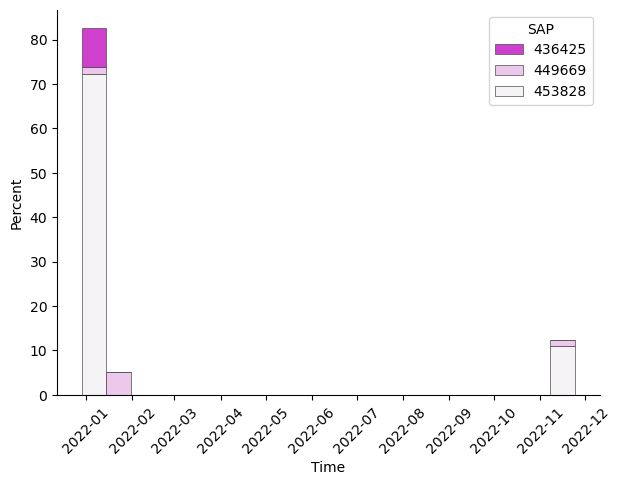

In [4]:
f, ax = plt.subplots(figsize=(7, 5))

sns.despine(f)

df_plot = df_pc.copy()
df_plot["Time"] = pd.to_datetime(df_plot["Time"]).round("30D")
df_plot = df_plot.sort_values("Time")

sns.histplot(data=df_plot, x="Time", hue="SAP", multiple="stack",
             palette="light:m_r",edgecolor=".3",linewidth=.5,bins=20,stat="percent", ax = ax)

plt.xticks(rotation=45)
plt.show()

In [5]:
processes= df_pc["Process"].unique()
designs = df_pc["SAP"].unique()

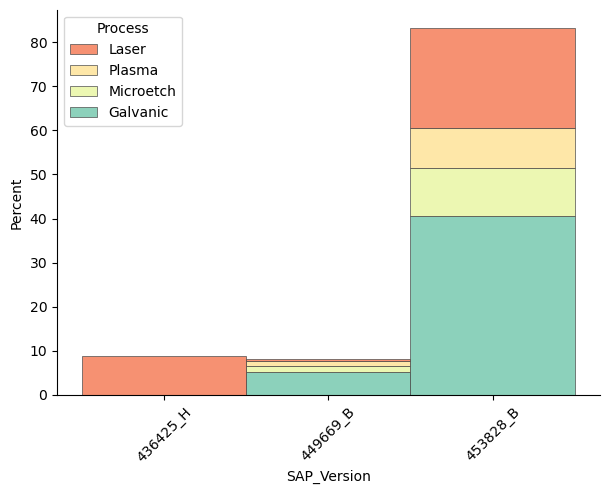

In [6]:
df_plot = df_pc.copy()
df_plot["SAP"] = df_plot["SAP"].apply(lambda x: str(x))
df_plot["SAP_Version"] = df_plot["SAP"]+"_"+df_plot["Version"]

processes= df_pc["Process"].unique()
designs = df_pc["SAP"].unique()

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    data = df_plot,
    x="SAP_Version", 
    hue="Process", 
    hue_order=processes,
    multiple="stack",
    palette="Spectral",
    edgecolor=".3",
    linewidth=.5,
    stat="percent")

plt.xticks(rotation=45)
plt.show()

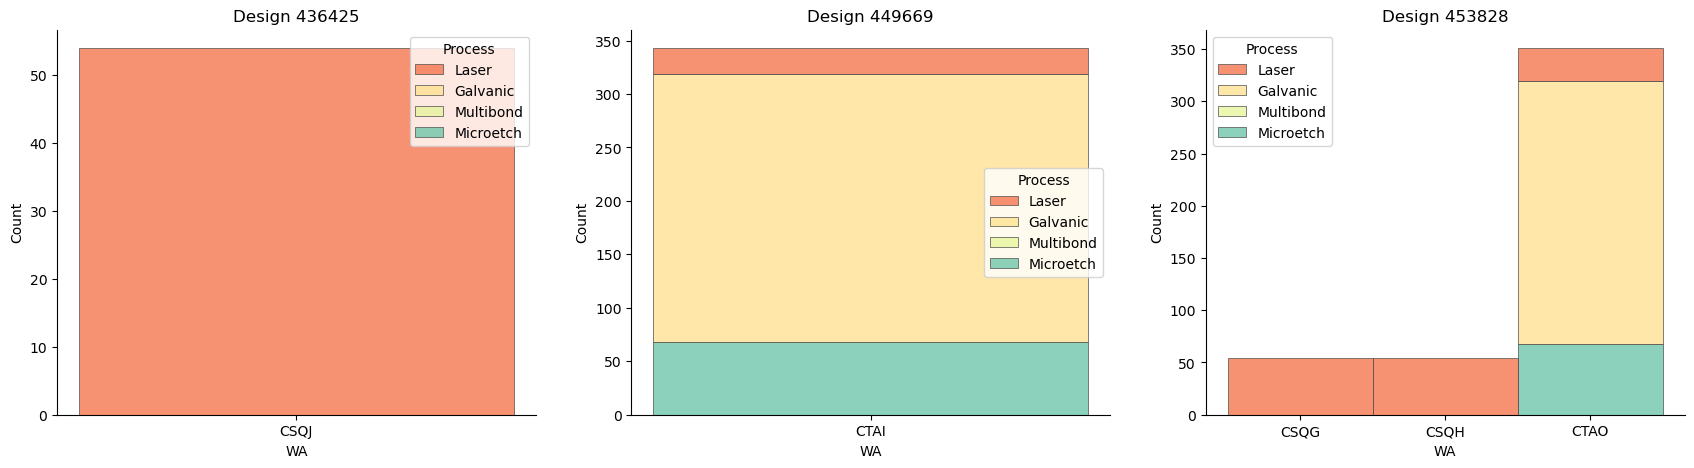

In [7]:
f, ax = plt.subplots(1,len(designs),figsize=(7*len(designs), 5))
sns.despine(f)

for i, sap in enumerate(designs):
    
    df_plot = df_pc.set_index("SAP").loc[sap].drop_duplicates(subset = ["WA","Position"])
    
    sns.histplot(data = df_plot ,x="WA", hue="Process", hue_order=["Laser","Galvanic","Multibond","Microetch"],
                 multiple="stack",palette="Spectral",edgecolor=".3",linewidth=.5,ax=ax[i])
    ax[i].set_title(f"Design {sap}")